<a href="https://colab.research.google.com/github/scorepia/Project_mornortor/blob/main/Tranfromer_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Handwrittent Signature - Transformer Model



In [1]:
!git clone https://github.com/ankanbhunia/Handwriting-Transformers
%cd Handwriting-Transformers
!pip install --upgrade --no-cache-dir gdown
!gdown --id 16g9zgysQnWk7-353_tMig92KsZsrcM6k && unzip files.zip && rm files.zip

Cloning into 'Handwriting-Transformers'...
remote: Enumerating objects: 497, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 497 (delta 54), reused 72 (delta 41), pack-reused 385
Receiving objects: 100% (497/497), 67.85 MiB | 16.21 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/Handwriting-Transformers
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16g9zgysQnWk7-353_tMig92KsZsrcM6k
To: /content/Handwriting-Transformers/files.zip
100% 685M/685M [

In [2]:
import os
import time
from data.dataset import TextDataset, TextDatasetval
import torch
import cv2
import os
import numpy as np
from models.model import TRGAN
from params import *
from torch import nn
from data.dataset import get_transform
import pickle
from PIL import Image
import tqdm
import shutil

In [3]:
text = "Kunanon Klinchanhom"
output_path = 'results'

In [4]:
#Pretrain Model Path
model_path = 'files/iam_model.pth'; data_path = 'files/IAM-32.pickle' #(iam)

In [7]:
#load model
TextDatasetObjval = TextDatasetval(base_path = data_path, num_examples = 5)
datasetval = torch.utils.data.DataLoader(
            TextDatasetObjval,
            batch_size=batch_size,
            shuffle=True,
            num_workers=0,
            pin_memory=True, drop_last=True,
            collate_fn=TextDatasetObjval.collate_fn)

model = TRGAN()
model.netG.load_state_dict(torch.load(model_path))


#text encodeing 
text_encode =  [j.encode() for j in text.split(' ')]
eval_text_encode, eval_len_text = model.netconverter.encode(text_encode)
eval_text_encode = eval_text_encode.to('cuda:0').repeat(batch_size, 1, 1)


initialize network with N02
initialize network with N02
initialize network with N02


In [8]:
#show image
if os.path.isdir(output_path): shutil.rmtree(output_path)
os.makedirs(output_path, exist_ok = True)

for i,data_val in enumerate(tqdm.tqdm(datasetval)): 

    page_val = model._generate_page(data_val['simg'].to(DEVICE), data_val['swids'], eval_text_encode,eval_len_text)

    cv2.imwrite(output_path+'/image' + str(i) + '.png', page_val*255)

print ('\nOutput images saved in : ' + output_path)

100%|██████████| 20/20 [00:07<00:00,  2.53it/s]


Output images saved in : results


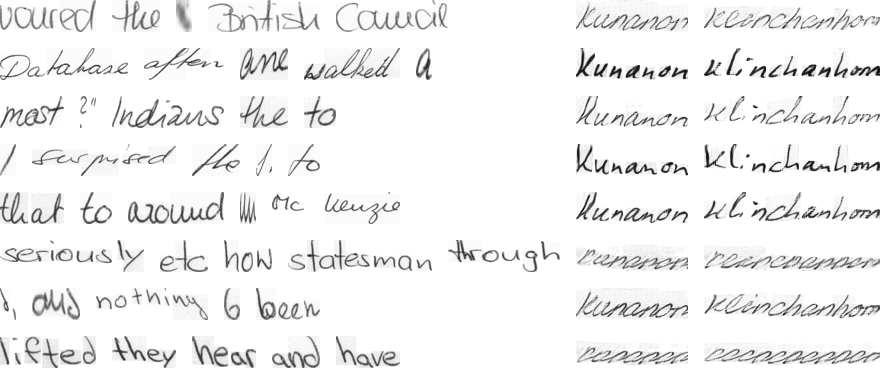

In [11]:
from IPython.display import Image
Image(filename=output_path+'/image0.png') 